# Clustering Credit Card Users
### Contents
* [Introduction](#Introduction)
* [Create Model and Cluster Data](#section-one)
* [Examine Differences Between Clusters](#section-two)
  - [Turnover](#section-three)
  - [Account Activity](#section-four)
  - [Age](#section-five)
  - [Gender](#section-six)
  - [Number of Dependants](#section-seven)
  - [Education Level](#section-eight)
  - [Marital Status](#section-nine)
  - [Income Level](#section-ten)
  - [Card Type](#section-eleven)
* [Conclusion](#Conclusion)

<a id="Introduction"></a>
# Introduction
For this analysis, we will be clustering credit card users based on their card activity, and then we will dig a little deeper to see what other attributes may be unique to each group.

With this information we can better understand our customer base and better serve the subgroups within, allowing us to potentially improve both the customer experience as well as business metrics like turnover and card usage.

Here is the page for the dataset:
https://www.kaggle.com/sakshigoyal7/credit-card-customers

I have summarized the columns and their definitions below.

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Customer's Age in Years
* Gender: Customer Gender - M=Male, F=Female
* Dependant_count: Number of dependents
* Education_Level: Educational Qualification of the account holder (example: high school, college graduate, etc.)
* Marital_Status: Married, Single, Divorced, Unknown
* Income_Category: Annual Income Category of the account holder (< 40K, 40K - 60K, 60K - 80K, 80K-120K, >
* Card_Category: Type of Card (Blue, Silver, Gold, Platinum)
* Months_on_book: Period of relationship with bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1) 
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1) 
* Avg_Utilization_Ratio: Average Card Utilization Ratio

It looks like we'll be working with a combination of demographic data and card activity data.
Let's read in our dataset and start exploring the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
cc = pd.read_csv('../input/credit-card-customers/BankChurners.csv')

# Last two columns not needed
cc = cc.iloc[:, :-2]

pd.set_option('display.max_columns', None)
cc.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
cc.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [4]:
cc.shape

(10127, 21)

Let's check for null values before we dive into the data.

In [5]:
cc.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<a id="section-one"></a>
# Create Model and Cluster Data
I have decided to use KMeans to cluster the customers based on their account activity, and then examine the demographic data of each group to see if they differ in a meaningful way.

**KMeans** is a clustering algorithm that groups data points together based on how similar they are to each other.
When we specify the number of clusters, K, that number of data points are randomly chosen as cluster centroids, and all the other data points are assigned to the cluster of the closest centroid. The centroid is then reassigned so that it becomes the average of the cluster.

This process is repeated until the size of the clusters becomes stable.

Let's import the libraries we'll need for our analysis.

In [6]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

cols = cc.iloc[:, 9:].select_dtypes(['uint8', 'int64', 'float64']).columns

When using KMeans, we have to specify the number of clusters the algorithm will use. One way to find the ideal number of clusters is the elbow method.

The **elbow method** allows us to identify at which K value the sum of squared distance, or the distance between data points and their respective centroids, begins to level off. 

The sum of squared distance flattening indicates that increasing the amount of clusters is not leading to better-defined clusters, so it is a good method to use when trying to find an optimal value for K.

Let's use the elbow method to select our value for K.

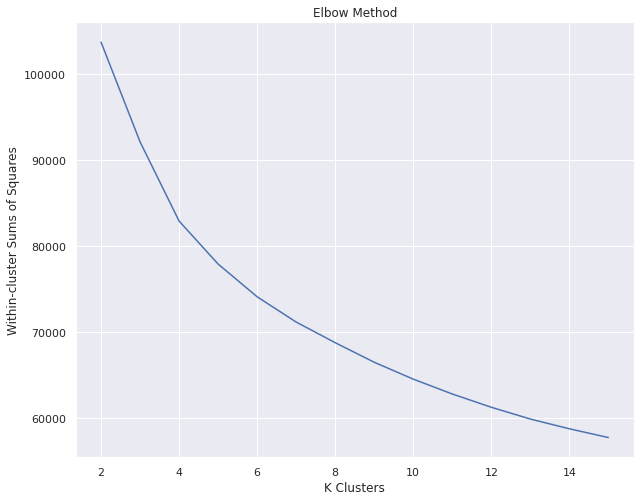

In [7]:
wcss = []

for i in range(2,16):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 1)
    data = StandardScaler().fit_transform(cc[cols])
    km.fit(data)
    wcss.append(km.inertia_)

fig = plt.figure(figsize=(10,8))
plt.plot(range(2,16), wcss)
plt.title('Elbow Method')
plt.xlabel('K Clusters')
plt.ylabel('Within-cluster Sums of Squares')
plt.show()

Unfortunately, the curve didn't flatten in an obvious way, which is often the case when dealing with groups that are not well-separated. With this in mind we'll go ahead and use the curve as a rough estimate for K.

It looks like the optimal number of clusters is somewhere between 4 and 6. After trying each number, 6 clusters returned the highest Silhouette Score, so I decided to proceed with 6 clusters. The **Silhoutte score** is a measure of how well defined clusters are, with scores near 1 indicating well-defined clusters, and scores near 0 indicating overlapping clusters.

Now let's create a pipeline that will first process our data and then create a KMeans model.

For preprocessing, we will first normalize our data, and then perform Principal Component Analysis.

**Principal Component Analysis**, or PCA, is a method that compresses the information found in the explanatory variables into a reduced number of new variables. This reduces the noise and dimensionality of the data while preserving most of the original information.

In [8]:
preprocessor = Pipeline(
[
 ("scaler", StandardScaler()),
 ("pca", PCA(n_components=2, random_state=1))
]
)

clusterer = Pipeline(
     [
       (
              "kmeans",
               KMeans(
                   n_clusters=6,
                   init="k-means++",
                   n_init=50,
                   max_iter=1000,
                   random_state=1
                      )
       )
      ]
   )

pipe = Pipeline(
        [
            ("preprocessor", preprocessor),
            ("clusterer", clusterer)
        ]
    )


pipe.fit(cc[cols])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=1))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=1000, n_clusters=6, n_init=50,
                                         random_state=1))]))])

In [9]:
print('PCA Component 1 Ratio of Explained Variance')
print(round(preprocessor['pca'].explained_variance_ratio_[0], 2))
print()
print('PCA Component 2 Ratio of Explained Variance')
print(round(preprocessor['pca'].explained_variance_ratio_[1], 2))

PCA Component 1 Ratio of Explained Variance
0.21

PCA Component 2 Ratio of Explained Variance
0.17


It looks like we were able to create and fit our model, with our 2 components from PCA explaining about 38% of the variance.

Now let's add the cluster labels to our data and see how well our clusters are defined.

In [10]:
preprocessed_data = pipe["preprocessor"].transform(cc[cols])

predicted_labels = pipe["clusterer"]["kmeans"].labels_

print('Silhouette Score: ', round(silhouette_score(preprocessed_data, predicted_labels), 3))

Silhouette Score:  0.395


While ideally the Silhouette score would be higher, given the somewhat non-distinct groups in the data we're using we will consider this as an acceptable score.

Let's take a look at the clusters on a scatterplot.

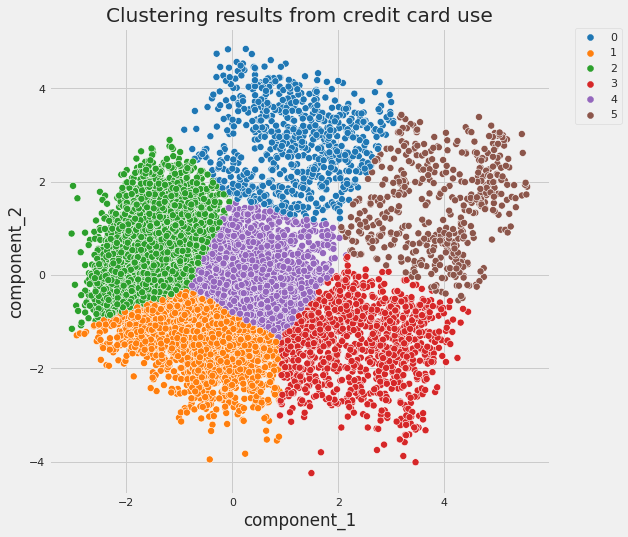

In [11]:
pcadf = pd.DataFrame(
        pipe["preprocessor"].transform(cc[cols]),
        columns=["component_1", "component_2"]
    )
   
pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
   
sp = sns.scatterplot(
        x="component_1",
        y="component_2",
        s=50,
        data=pcadf,
        hue="predicted_cluster",
        palette='tab10'
    )
   
sp.set_title(
        "Clustering results from credit card use"
    )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
   
plt.show()

As we saw from the Silhouette score, there is clearly some overlap between clusters, but overall there appears to be several distinct clusters in the data.

Let's look at how many people are in each cluster next.

In [12]:
cc['cluster'] = pipe['clusterer']['kmeans'].labels_
cc.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,cluster
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,4
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,2
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,2
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,2
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,2


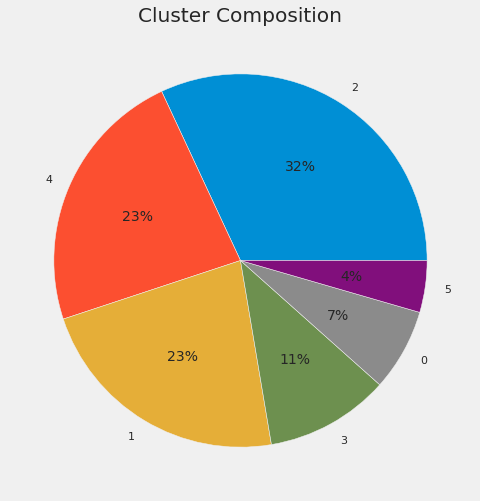

In [13]:
fig, axs = plt.subplots(figsize=(12,8))
ax = cc['cluster'].value_counts().plot.pie(title='Cluster Composition', autopct='%1.0f%%')
plt.title=False
ax.set_ylabel('')
plt.show()

Most users fall into either Group 1, 2, or 4, with most of the rest being in Groups 0 and 3.

<a id="section-two"></a>
# Examine Differences Between Clusters
Now let's examine in detail how each cluster differs from the others.

First, could there be significant differences in turnover between groups?

<a id="section-three"></a>
## Turnover

<AxesSubplot:title={'center':'Group 6'}>

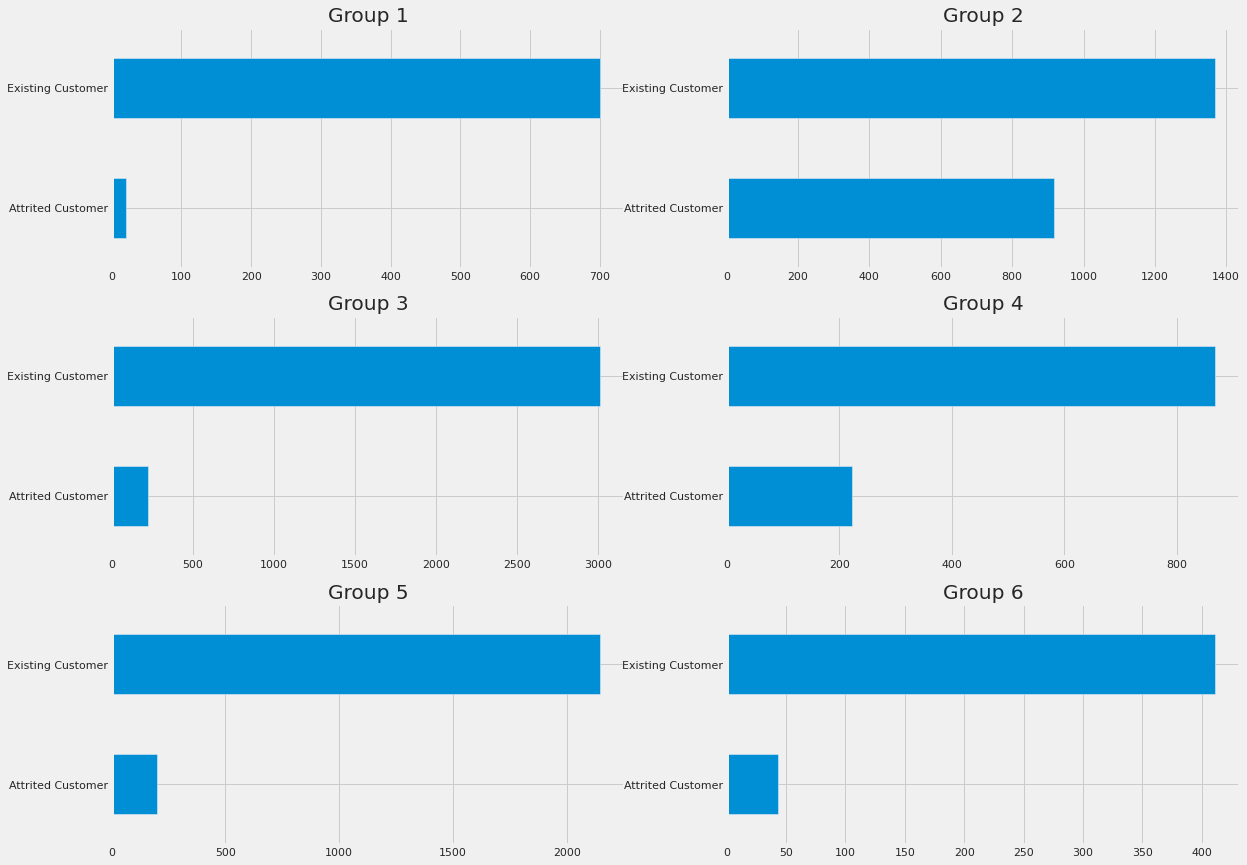

In [14]:
fig, axs = plt.subplots(ncols=2,nrows=3, figsize=(18,14))

cc[cc['cluster'] == 0]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[0,0], title='Group 1')
cc[cc['cluster'] == 1]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[0,1], title='Group 2')
cc[cc['cluster'] == 2]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[1,0], title='Group 3')
cc[cc['cluster'] == 3]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[1,1], title='Group 4')
cc[cc['cluster'] == 4]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[2,0], title='Group 5')
cc[cc['cluster'] == 5]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[2,1], title='Group 6')

It looks like Groups 2 and 4 have a significantly higher rate of customer attrition, while Group 1 has a significantly lower rate of attrition.

Let's look at the differences in account activity between groups next.

<a id="section-four"></a>
## Account Activity

In [15]:
scaler = StandardScaler()
scaled_cc = pd.DataFrame(scaler.fit_transform(cc[cols]), columns=cols)
scaled_cc['cluster'] = pipe['clusterer']['kmeans'].labels_
scaled_cc.head()

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,cluster
0,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,4
1,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,2
2,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,2
3,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,2
4,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,2


<AxesSubplot:title={'center':'Group 6'}>

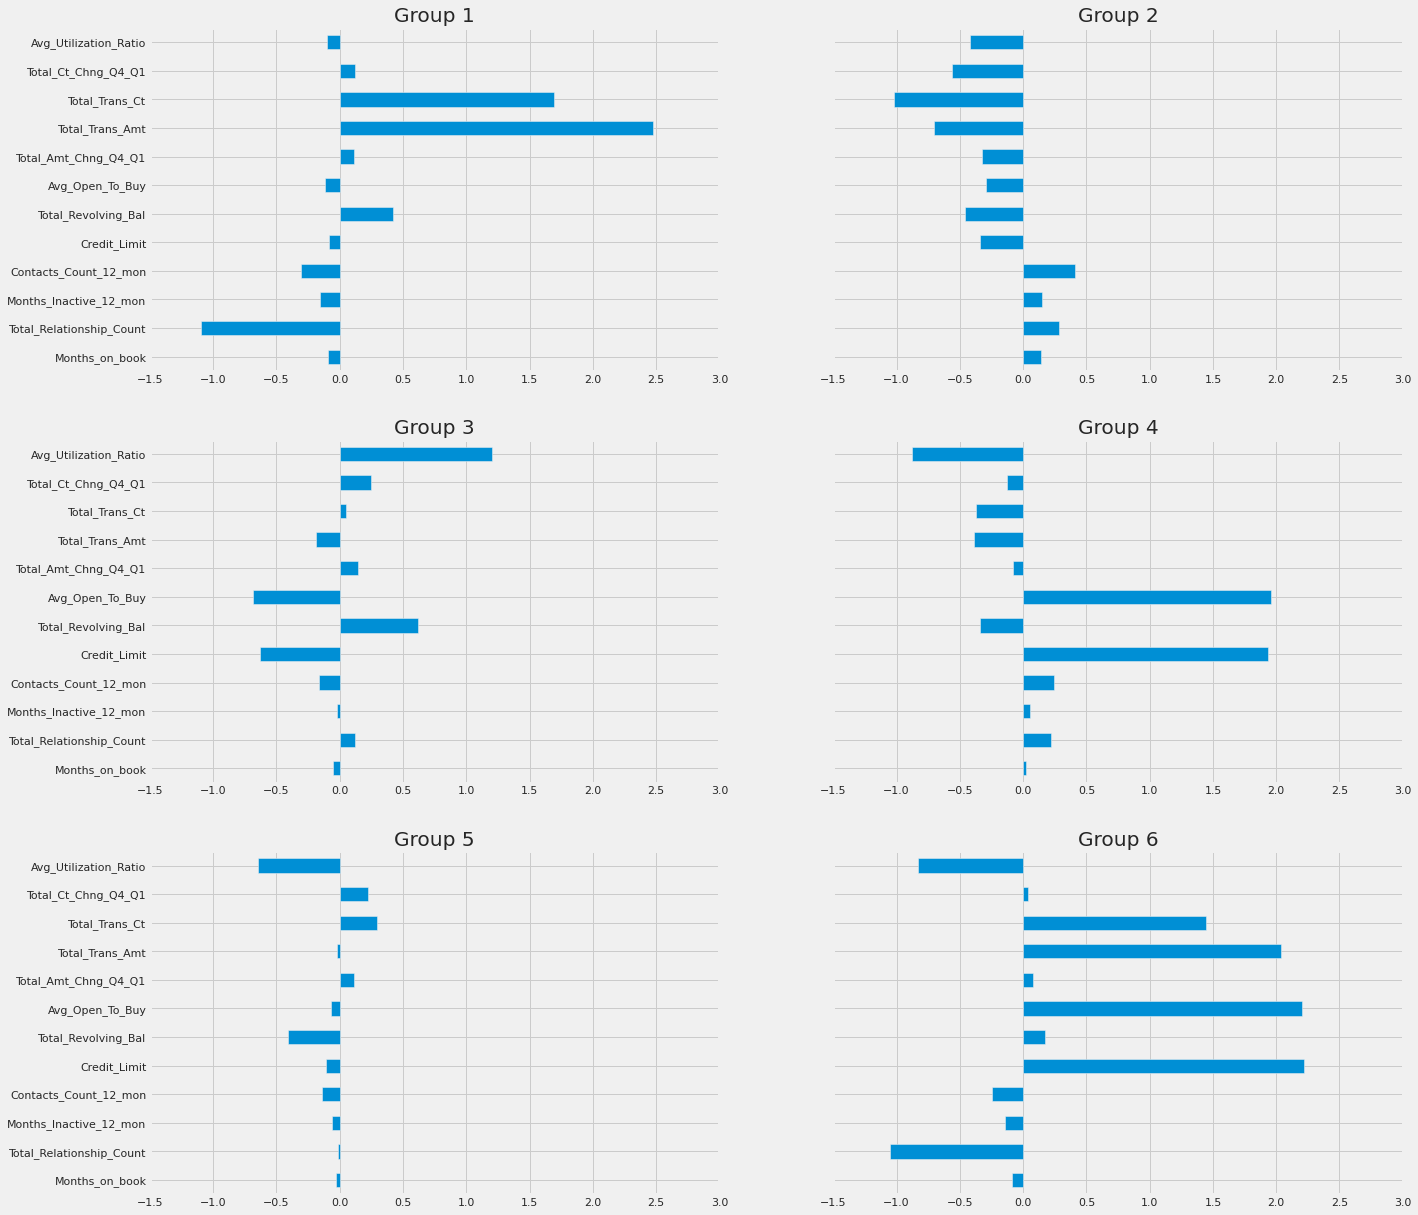

In [16]:
fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(20,32))

scaled_cc[scaled_cc['cluster'] == 0][cols].mean().plot.barh(ax=axs[0,0], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 1')
scaled_cc[scaled_cc['cluster'] == 1][cols].mean().plot.barh(ax=axs[0,1], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 2')
scaled_cc[scaled_cc['cluster'] == 2][cols].mean().plot.barh(ax=axs[1,0], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 3')
scaled_cc[scaled_cc['cluster'] == 3][cols].mean().plot.barh(ax=axs[1,1], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 4')
scaled_cc[scaled_cc['cluster'] == 4][cols].mean().plot.barh(ax=axs[2,0], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 5')
scaled_cc[scaled_cc['cluster'] == 5][cols].mean().plot.barh(ax=axs[2,1], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 6')

Looking at the charts above, we can see the groups have the following characteristics:

* Group 1: High transaction count and amount, higher balance, low relationship count, lower contact count
* Group 2: Low transaction count and amount, lower count and amount change from Q4 to Q1, high contact count, higher relationship count, higher months on book, higher months inactive, lower balance
* Group 3: High utilization ratio, higher count and amount change from Q4 to Q1, low avg open to buy, higher balance, low credit limit 
* Group 4: Low transaction count and amount, low utilization ratio, lower count and amount change from Q4 to Q1, high contact count, higher relationship count, lower balance
* Group 5: Lower utilization ratio, higher transaction count, higher transaction count change from Q1 to Q4, low balance
* Group 6: High transaction count and amount, high avg open to buy, high credit limit, low relationship count, low utilization ratio

Based on the results above, I decided to give the following names to each of the groups:

Group 1: Higher balance heavy users

Group 2: Long-time very light users

Group 3: Low limit, high balance light users

Group 4: High limit, low balance light users

Group 5: Low limit, low balance light users

Group 6: High limit, low balance heavy users

Now let's look at some of the demographic data for each of the groups.

<a id="section-five"></a>
## Age

[Text(0.5, 1.0, 'High limit, low balance heavy users'),
 Text(0, 0.5, ''),
 Text(0.5, 0, '')]

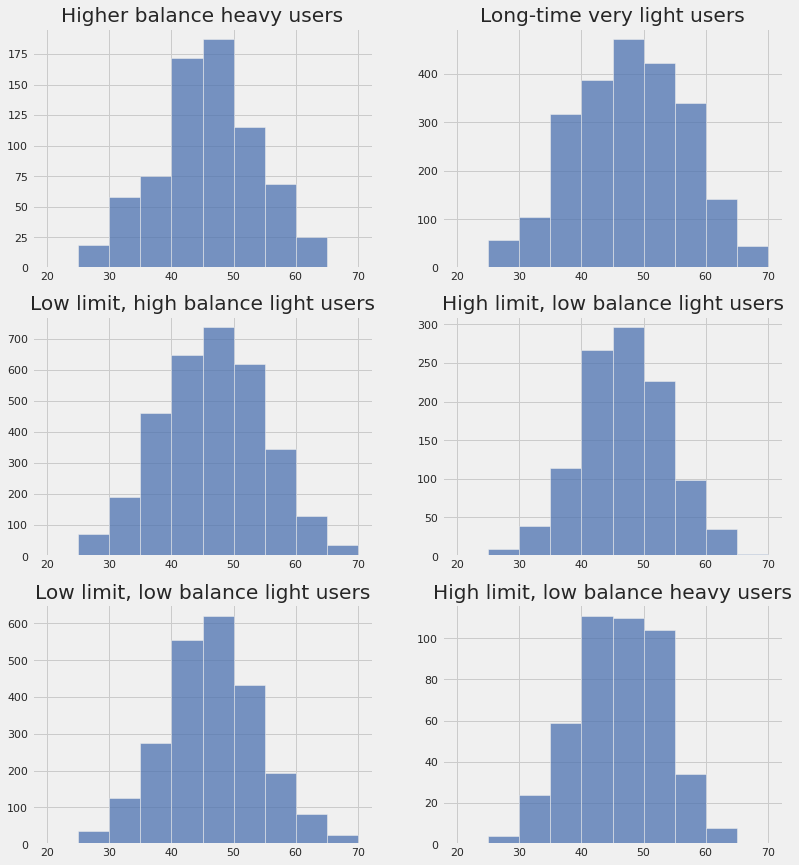

In [17]:
fig, axs = plt.subplots(ncols=2,nrows=3, figsize=(12,14))

sns.histplot(cc[cc['cluster'] == 0]['Customer_Age'], ax=axs[0,0], binrange=(20,70), binwidth=5).set(title='Higher balance heavy users', ylabel='', xlabel='')
sns.histplot(cc[cc['cluster'] == 1]['Customer_Age'], ax=axs[0,1], binrange=(20,70), binwidth=5).set(title='Long-time very light users', ylabel='', xlabel='')
sns.histplot(cc[cc['cluster'] == 2]['Customer_Age'], ax=axs[1,0], binrange=(20,70), binwidth=5).set(title='Low limit, high balance light users', ylabel='', xlabel='')
sns.histplot(cc[cc['cluster'] == 3]['Customer_Age'], ax=axs[1,1], binrange=(20,70), binwidth=5).set(title='High limit, low balance light users', ylabel='', xlabel='')
sns.histplot(cc[cc['cluster'] == 4]['Customer_Age'], ax=axs[2,0], binrange=(20,70), binwidth=5).set(title='Low limit, low balance light users', ylabel='', xlabel='')
sns.histplot(cc[cc['cluster'] == 5]['Customer_Age'], ax=axs[2,1], binrange=(20,70), binwidth=5).set(title='High limit, low balance heavy users', ylabel='', xlabel='')

It looks like the majority of users are in their 40's and 50's for all groups. Long-time light users have a higher number of users in their 60's compared to other groups. Long-time light users and Low-limit high balance light users seem to have a higher number of users in their 30's.

<a id="section-six"></a>
## Gender

<AxesSubplot:title={'center':'High limit, low balance heavy users'}>

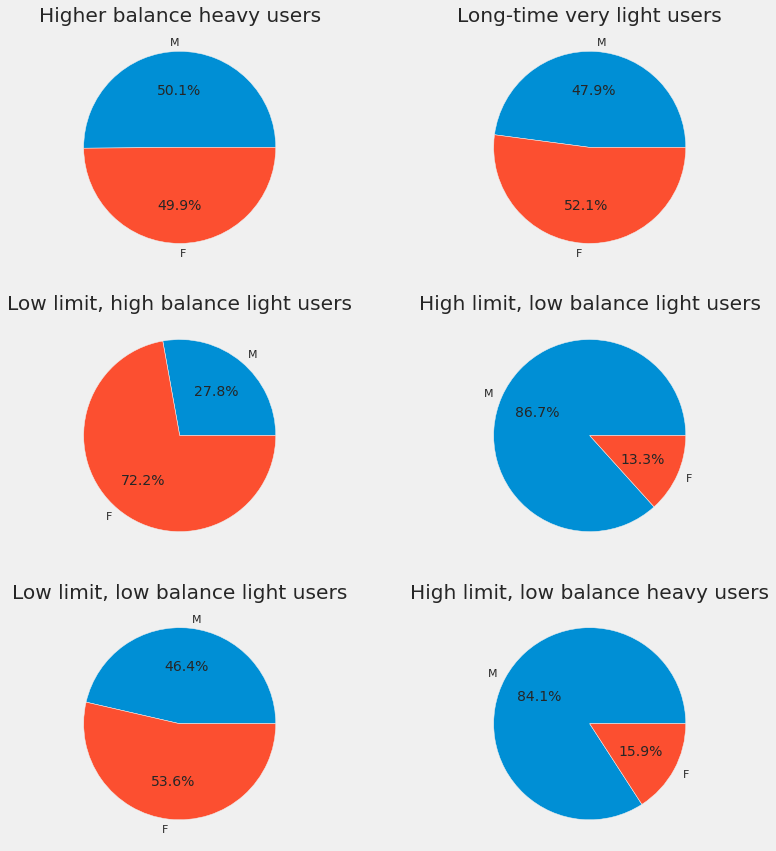

In [18]:
fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(12,14))

cc[cc['cluster'] == 0]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[0,0], ylabel='', title='Higher balance heavy users', autopct='%.1f%%')
cc[cc['cluster'] == 1]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[0,1], ylabel='', title='Long-time very light users', autopct='%.1f%%')
cc[cc['cluster'] == 2]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[1,0], ylabel='', title='Low limit, high balance light users', autopct='%.1f%%')
cc[cc['cluster'] == 3]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[1,1], ylabel='', title='High limit, low balance light users', autopct='%.1f%%')
cc[cc['cluster'] == 4]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[2,0], ylabel='', title='Low limit, low balance light users', autopct='%.1f%%')
cc[cc['cluster'] == 5]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[2,1], ylabel='', title='High limit, low balance heavy users', autopct='%.1f%%')

The higher limit groups mostly consist of men, while the Low limit, high balance light users group mostly consists of women.

<a id="section-seven"></a>
## Number of Dependants

<AxesSubplot:title={'center':'High limit, low balance heavy users'}>

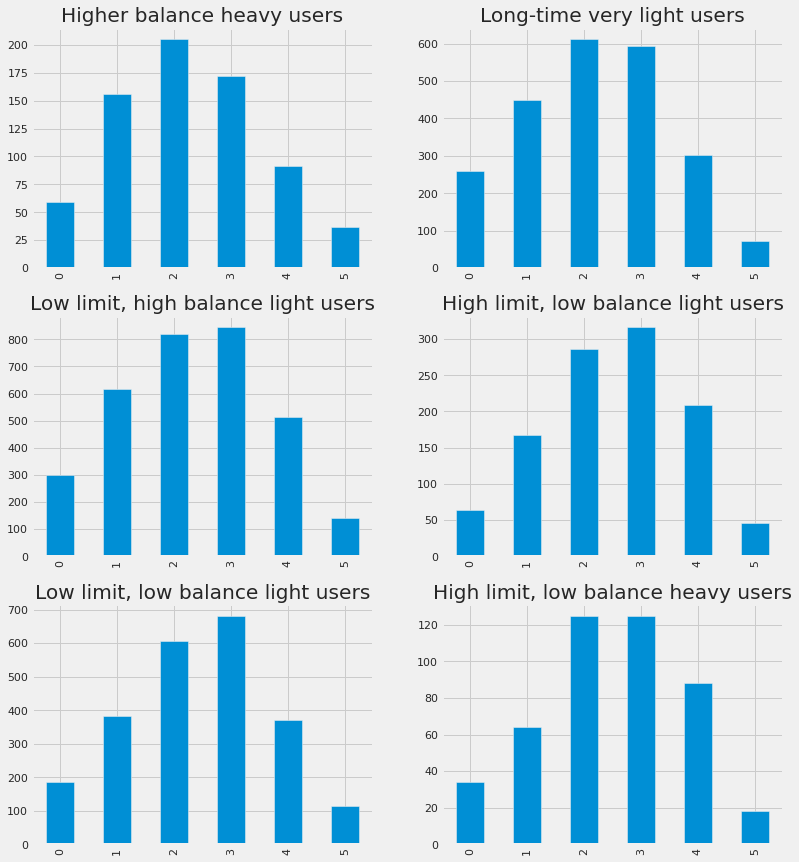

In [19]:
fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(12,14))

cc[cc['cluster'] == 0]['Dependent_count'].value_counts().sort_index().plot.bar(ax=axs[0,0], title='Higher balance heavy users')
cc[cc['cluster'] == 1]['Dependent_count'].value_counts().sort_index().plot.bar(ax=axs[0,1], title='Long-time very light users')
cc[cc['cluster'] == 2]['Dependent_count'].value_counts().sort_index().plot.bar(ax=axs[1,0], title='Low limit, high balance light users')
cc[cc['cluster'] == 3]['Dependent_count'].value_counts().sort_index().plot.bar(ax=axs[1,1], title='High limit, low balance light users')
cc[cc['cluster'] == 4]['Dependent_count'].value_counts().sort_index().plot.bar(ax=axs[2,0], title='Low limit, low balance light users')
cc[cc['cluster'] == 5]['Dependent_count'].value_counts().sort_index().plot.bar(ax=axs[2,1], title='High limit, low balance heavy users')

There doesn't seem to be any significant differences in the number of dependants between groups.

<a id="section-eight"></a>
## Education Level

<AxesSubplot:title={'center':'High limit, low balance heavy users'}>

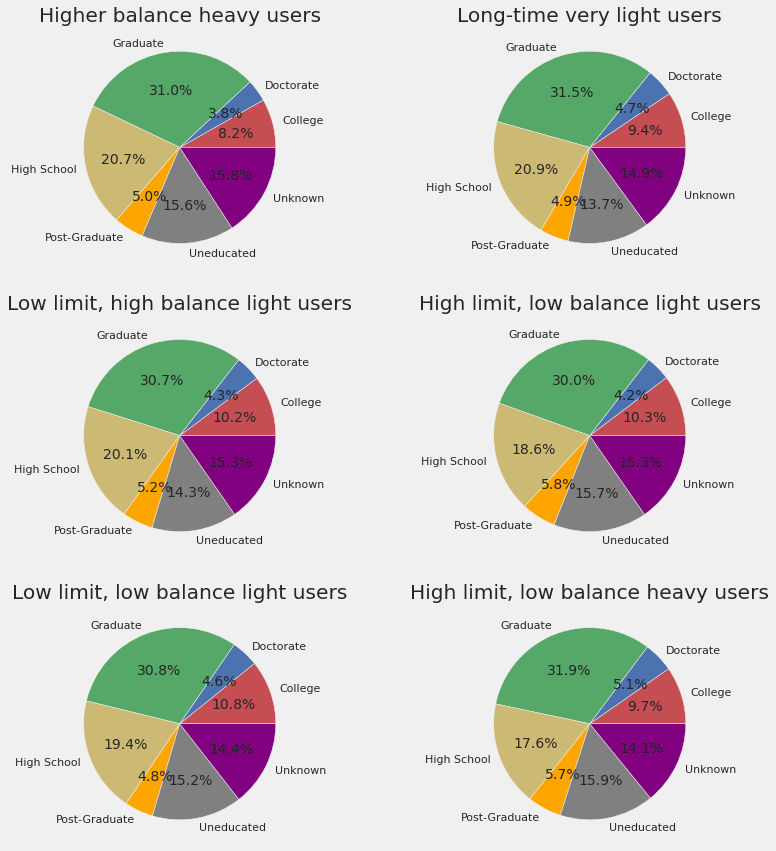

In [20]:
fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(12,14))

cc[cc['cluster'] == 0]['Education_Level'].value_counts().sort_index().plot.pie(ax=axs[0,0], ylabel='', title='Higher balance heavy users', colors=['r','b','g','y','orange', 'gray','purple'], autopct='%.1f%%')
cc[cc['cluster'] == 1]['Education_Level'].value_counts().sort_index().plot.pie(ax=axs[0,1], ylabel='', title='Long-time very light users', colors=['r','b','g','y','orange', 'gray','purple'], autopct='%.1f%%')
cc[cc['cluster'] == 2]['Education_Level'].value_counts().sort_index().plot.pie(ax=axs[1,0], ylabel='', title='Low limit, high balance light users', colors=['r','b','g','y','orange', 'gray','purple'], autopct='%.1f%%')
cc[cc['cluster'] == 3]['Education_Level'].value_counts().sort_index().plot.pie(ax=axs[1,1], ylabel='', title='High limit, low balance light users', colors=['r','b','g','y','orange', 'gray','purple'], autopct='%.1f%%')
cc[cc['cluster'] == 4]['Education_Level'].value_counts().sort_index().plot.pie(ax=axs[2,0], ylabel='', title='Low limit, low balance light users', colors=['r','b','g','y','orange', 'gray','purple'], autopct='%.1f%%')
cc[cc['cluster'] == 5]['Education_Level'].value_counts().sort_index().plot.pie(ax=axs[2,1], ylabel='', title='High limit, low balance heavy users', colors=['r','b','g','y','orange', 'gray','purple'], autopct='%.1f%%')

There doesn't seem to be any significant differences in education between groups.

<a id="section-nine"></a>
## Marital Status

<AxesSubplot:title={'center':'High limit, low balance heavy users'}>

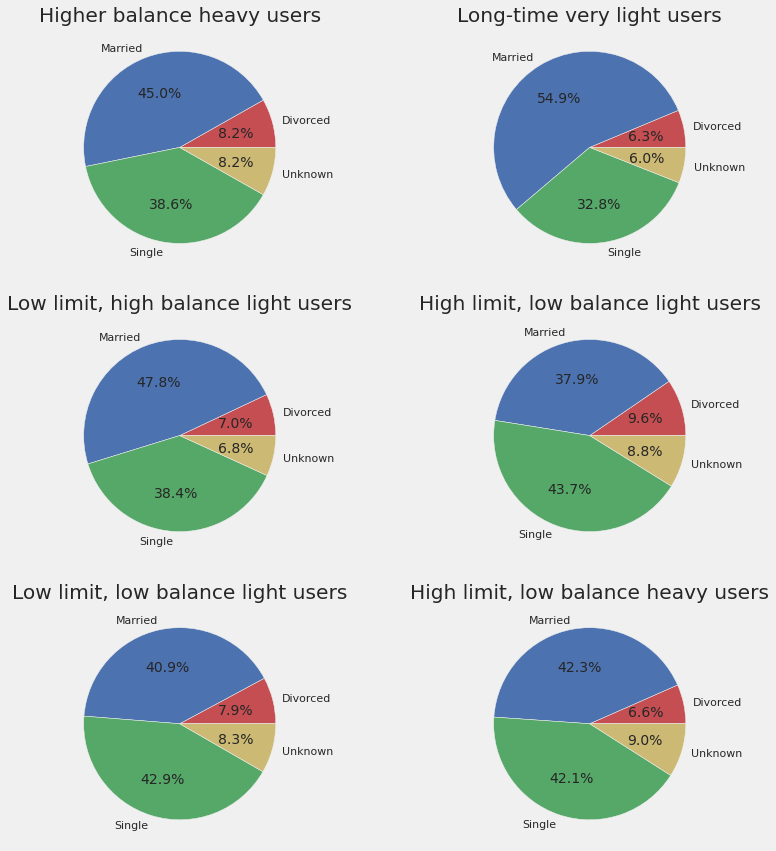

In [21]:
fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(12,14))

cc[cc['cluster'] == 0]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[0,0], ylabel='', title='Higher balance heavy users', colors=['r','b','g','y'], autopct='%.1f%%')
cc[cc['cluster'] == 1]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[0,1], ylabel='', title='Long-time very light users', colors=['r','b','g','y'], autopct='%.1f%%')
cc[cc['cluster'] == 2]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[1,0], ylabel='', title='Low limit, high balance light users', colors=['r','b','g','y'], autopct='%.1f%%')
cc[cc['cluster'] == 3]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[1,1], ylabel='', title='High limit, low balance light users', colors=['r','b','g','y'], autopct='%.1f%%')
cc[cc['cluster'] == 4]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[2,0], ylabel='', title='Low limit, low balance light users', colors=['r','b','g','y'], autopct='%.1f%%')
cc[cc['cluster'] == 5]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[2,1], ylabel='', title='High limit, low balance heavy users', colors=['r','b','g','y'], autopct='%.1f%%')

Long-time light users have a significantly higher number of married users compared to other groups.

<a id="section-ten"></a>
## Income Level

<AxesSubplot:title={'center':'High limit, low balance heavy users'}>

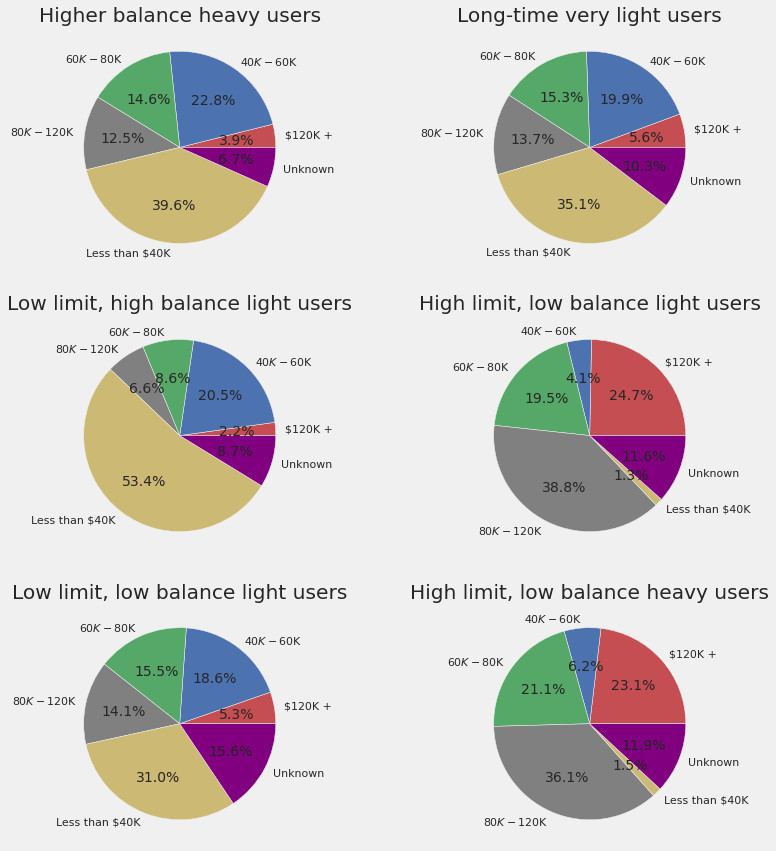

In [22]:
fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(12,14))

cc[cc['cluster'] == 0]['Income_Category'].value_counts().sort_index().plot(kind='pie', ax=axs[0,0], ylabel='', title='Higher balance heavy users', colors=['r','b','g','gray','y','purple'], autopct='%.1f%%')
cc[cc['cluster'] == 1]['Income_Category'].value_counts().sort_index().plot(kind='pie', ax=axs[0,1], ylabel='', title='Long-time very light users', colors=['r','b','g','gray','y','purple'], autopct='%.1f%%')
cc[cc['cluster'] == 2]['Income_Category'].value_counts().sort_index().plot(kind='pie', ax=axs[1,0], ylabel='', title='Low limit, high balance light users', colors=['r','b','g','gray','y','purple'], autopct='%.1f%%')
cc[cc['cluster'] == 3]['Income_Category'].value_counts().sort_index().plot(kind='pie', ax=axs[1,1], ylabel='', title='High limit, low balance light users', colors=['r','b','g','gray','y','purple'], autopct='%.1f%%')
cc[cc['cluster'] == 4]['Income_Category'].value_counts().sort_index().plot(kind='pie', ax=axs[2,0], ylabel='', title='Low limit, low balance light users', colors=['r','b','g','gray','y','purple'], autopct='%.1f%%')
cc[cc['cluster'] == 5]['Income_Category'].value_counts().sort_index().plot(kind='pie', ax=axs[2,1], ylabel='', title='High limit, low balance heavy users', colors=['r','b','g','gray','y','purple'], autopct='%.1f%%')

It looks like card limit and income are significantly correlated, with at least 60% of users in the high limit groups making at least 80K, and at least 50% of users in the low limit and high balance groups making less than 60K.

<a id="section-eleven"></a>
## Card Type

<AxesSubplot:title={'center':'High limit, low balance heavy users'}>

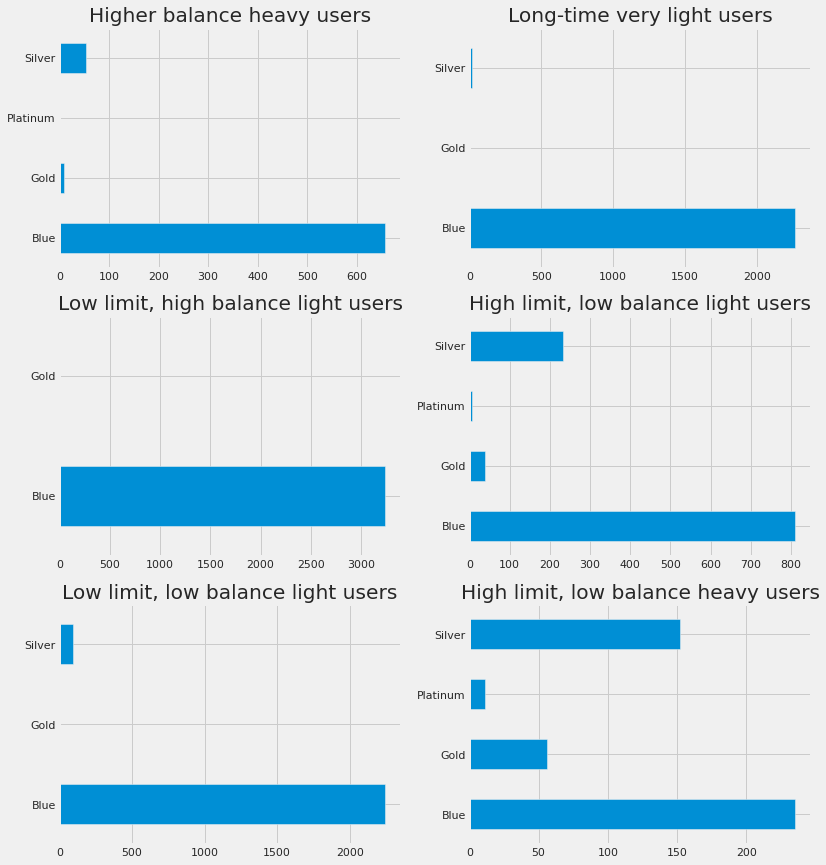

In [23]:
fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(12,14))

cc[cc['cluster'] == 0]['Card_Category'].value_counts().sort_index().plot.barh(ax=axs[0,0], ylabel='', title='Higher balance heavy users')
cc[cc['cluster'] == 1]['Card_Category'].value_counts().sort_index().plot.barh(ax=axs[0,1], ylabel='', title='Long-time very light users')
cc[cc['cluster'] == 2]['Card_Category'].value_counts().sort_index().plot.barh(ax=axs[1,0], ylabel='', title='Low limit, high balance light users')
cc[cc['cluster'] == 3]['Card_Category'].value_counts().sort_index().plot.barh(ax=axs[1,1], ylabel='', title='High limit, low balance light users')
cc[cc['cluster'] == 4]['Card_Category'].value_counts().sort_index().plot.barh(ax=axs[2,0], ylabel='', title='Low limit, low balance light users')
cc[cc['cluster'] == 5]['Card_Category'].value_counts().sort_index().plot.barh(ax=axs[2,1], ylabel='', title='High limit, low balance heavy users')

As expected, Silver, Gold, and Platinum card holders mostly fall into the high limit groups.

# Conclusion
Based on the our model, we clustered the credit card users into the following groups:

Group 1: Higher balance heavy users

Group 2: Long-time very light users

Group 3: Low limit, high balance light users

Group 4: High limit, low balance light users

Group 5: Low limit, low balance light users

Group 6: High limit, low balance heavy users

Looking at the demographic data of each group, we also found the following:

1. Long-time light users are the most likely to turnover
2. Most users are in their 40's and 50's
3. High limit users are mostly male
4. The ratio of married users is higher among Long-time light users
5. High limit users have significantly higher income than other groups, and are more likely to carry premium cards

Through this analysis we have gained a good understanding of the groups that exist within the customers, as well as some of the attributes of each group.

A great next step would be to try and predict which customers are more likely to turnover, possibly incorporating the group labels or other information found here.

Thank you for reading!